In [ ]:
import pandas as pd
pd.set_option("display.max_columns", None)

# [Quickstart](https://pycaret.gitbook.io/docs/get-started/quickstart)

## [Regression](https://pycaret.gitbook.io/docs/get-started/quickstart#regression)

PyCaret’s **Regression Module** is a supervised machine learning module that is used for estimating the relationships between a **dependent variable** (often called the ‘outcome variable’, or ‘target’) and one or more **independent variables** (often called ‘features’, ‘predictors’, or ‘covariates’). The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. It provides several [pre-processing](https://pycaret.gitbook.io/docs/get-started/preprocessing) features that prepare the data for modeling through the [setup](https://pycaret.gitbook.io/docs/get-started/functions#setting-up-environment) function. It has over 25 ready-to-use algorithms and [several plots](https://pycaret.gitbook.io/docs/get-started/functions#plot-model) to analyze the performance of trained models.


PyCaret の**回帰モジュール**は、**従属変数**(しばしば「結果変数」または「ターゲット」と呼ばれる) と 1 つ以上の**独立変数**(しばしば「 特徴」、「予測子」、または「共変量」)。 回帰の目的は、売上高の予測、数量の予測、温度の予測などの連続値を予測することです。[セットアップ](https://pycaret.gitbook.io/docs/get-started/functions#setting-up-environment) 機能を使用してモデリング用のデータを準備するいくつかの [前処理](https://pycaret.gitbook.io/docs/get-started/preprocessing)  機能を提供します。 トレーニング済みモデルのパフォーマンスを分析するために、25 を超えるすぐに使用できるアルゴリズムと [複数のプロット](https://pycaret.gitbook.io/docs/get-started/functions#plot-model) があります。

### Setup

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two mandatory parameters: `data` and `target`. All the other parameters are optional.

### セットアップ

この関数は、学習環境を初期化し、変換パイプラインを作成します。Setup 関数は他の関数を実行する前に呼び出す必要があります。この関数は2つの必須パラメータを受け取る。`data` と `target` です。その他のパラメータはオプションです。

In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


When the `setup` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To handle this, PyCaret displays a prompt, asking for data types confirmation, once you execute the `setup`. You can press enter if all data types are correct or type `quit` to exit the setup.

Ensuring that the data types are correct is really important in PyCaret as it automatically performs multiple type-specific preprocessing tasks which are imperative for machine learning models.

Alternatively, you can also use `numeric_features` and `categorical_features` parameters in the setup to pre-define the data types.

`setup` を実行すると、PyCaret の推論アルゴリズムが、特定のプロパティに基づいてすべての素性のデータ型を自動的に推論します。データ型は正しく推論されるはずですが、必ずしもそうなるとは限りません。これを処理するために、PyCaret は `setup` を実行すると、データ型の確認を求めるプロンプトを表示します。すべてのデータ型が正しい場合は Enter キーを、セットアップを終了する場合は `quit` と入力します。

PyCaret は機械学習モデルで必須となる、データ型に特化した複数の前処理を自動的に行うため、データ型が正しいかどうかを確認することは非常に重要なことです。

また、 `numeric_features` と `categorical_features` パラメータを使用して、データ型をあらかじめ定義しておくこともできます。

In [2]:
from pycaret.regression import *
s = setup(data, target='charges')

,Description,Value
0,session_id,997
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


### Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

### モデルの比較

この関数は，モデルライブラリで利用可能な全ての推定量を交差検証により学習・評価する．この関数の出力は，交差検証で評価された平均スコアを含むスコアリンググリッドである．CV中に評価されたメトリクスは `get_metrics` 関数を用いてアクセスすることができる。カスタムメトリクスの追加や削除は `add_metric` および `remove_metric` 関数で行うことができる。

In [3]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2757.2597,23089397.8361,4730.7335,0.8374,0.4469,0.3247,0.0180
catboost,CatBoost Regressor,2852.7061,24505289.1540,4887.1950,0.8283,0.4676,0.3291,0.1360
lightgbm,Light Gradient Boosting Machine,3004.6701,25109220.0293,4964.9319,0.8236,0.5300,0.3772,0.0230
rf,Random Forest Regressor,2846.2399,25336809.2299,4973.6881,0.8217,0.4746,0.3391,0.0760
et,Extra Trees Regressor,2875.4387,28639816.7608,5297.2743,0.8009,0.4789,0.3231,0.0690
xgboost,Extreme Gradient Boosting,3138.1990,29322433.0000,5360.0433,0.7942,0.5542,0.3823,0.0400
ada,AdaBoost Regressor,4709.9029,32149179.2502,5628.5260,0.7754,0.6686,0.8144,0.0090
ridge,Ridge Regression,4387.5486,39841008.4000,6263.7987,0.7262,0.5893,0.4385,0.0050
lar,Least Angle Regression,4374.9931,39843501.4818,6263.8174,0.7261,0.6062,0.4365,0.0050
br,Bayesian Ridge,4385.5203,39843850.1550,6263.9863,0.7261,0.5910,0.4381,0.0050


In [4]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=997, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


### Analyze Model

This function analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

### モデルの解析

この関数はテスト集合における学習済みモデルのパフォーマンスを解析する。場合によっては，モデルの再トレーニングが必要になることがあります．

In [5]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

`evaluate_model` can only be used in Notebook since it uses `ipywidget` . You can also use the plot_model function to generate plots individually.

`evaluate_model` は `ipywidget` を使用しているため、Notebook でのみ使用することができます。plot_model 関数を使用して、プロットを個別に生成することもできます。

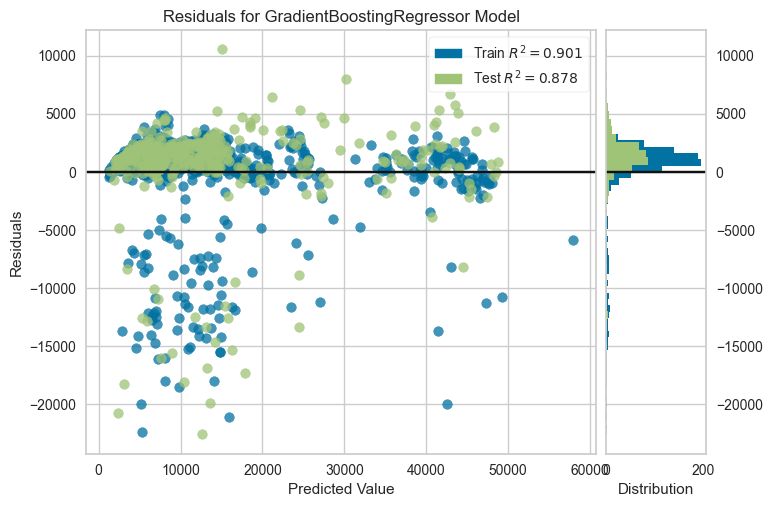

In [6]:
plot_model(best, plot='residuals')

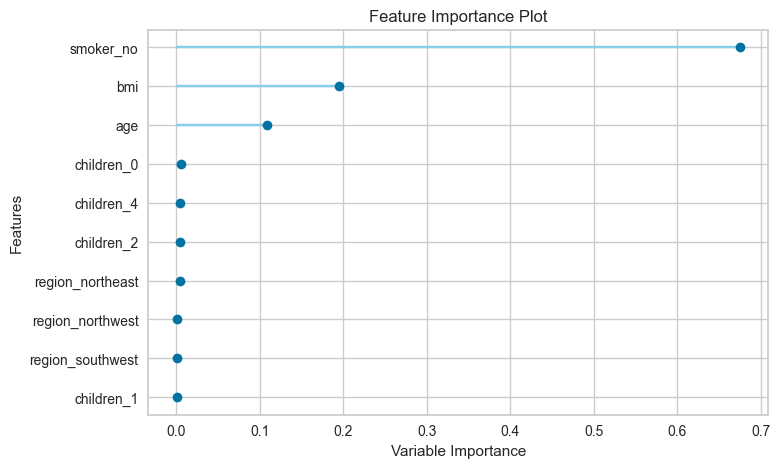

In [7]:
plot_model(best, plot='feature')

### Predictions

This function predicts `Label` using the trained model. When `data` is None, it predicts label and score on the test set (created during the `setup` function).

### 予測

この関数は、学習されたモデルを用いて `Label` を予測する。`data` が None の場合は、テストセット (`setup` 関数で作成される) を用いてラベルとスコアを予測する。

In [8]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2426.7225,17126630.1504,4138.4333,0.8781,0.3799,0.2870


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,28.0,33.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4449.461914,5934.023552
1,22.0,24.299999,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2150.468994,3088.525603
2,22.0,39.805000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2755.020996,3746.035085
3,35.0,28.025000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20234.855469,20592.580350
4,62.0,31.459999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,27000.984375,15431.902536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,46.0,27.600000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,24603.048828,9000.461765
398,21.0,39.490002,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2026.974121,3038.504719
399,53.0,36.599998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11264.541016,12593.806029
400,39.0,22.799999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7985.814941,8672.824180


The evaluation metrics are calculated on the test set. The second output is the `pd.DataFrame` with predictions on the test set (see the last two columns). To generate labels on the unseen (new) dataset, simply pass the dataset in the `predict_model` function.

評価指標はテストセットで計算されます。2番目の出力は、テストセットに対する予測値を含む `pd.DataFrame` です（最後の2列を参照）。未見の（新しい）データセットに対してラベルを生成するには、単に `predict_model` 関数にデータセットを渡せばよいのです。

In [9]:
predictions = predict_model(best, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2251.1142,15516594.3404,3939.1109,0.8941,0.3634,0.2695


,age,sex,bmi,children,smoker,region,charges,Label
0,19,female,27.900,0,yes,southwest,16884.92400,17720.369422
1,18,male,33.770,1,no,southeast,1725.55230,3669.411653
2,28,male,33.000,3,no,southeast,4449.46200,5934.023552
3,33,male,22.705,0,no,northwest,21984.47061,10601.235657
4,32,male,28.880,0,no,northwest,3866.85520,4088.676486


### Save the model

### モデルの保存

In [10]:
save_model(best, 'my_best_pipeline_reg')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           

#### To load the model back in the environment:

#### モデルを環境に戻すには:

In [11]:
loaded_model = load_model('my_best_pipeline_reg')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_dec